<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<center><font size=10>Generative AI for Business Applications</center></font>
<center><font size=6>Embeddings to Transformers - Week 3</center></font>

<center><img src="https://cdn.pixabay.com/photo/2018/03/06/08/31/drone-3202860_1280.jpg" width="720"/></center>

<center><font size=5>Product Reviews Sentiment Analysis </center></font>

## Problem Statement

### Business Context

In the digital commerce landscape, customer reviews serve as a direct channel of communication between consumers and businesses, offering candid feedback on products and services. These reviews often contain valuable insights not only about customer satisfaction but also about product performance, usability, and perceived value. However, given the volume and unstructured nature of this data, manually interpreting such feedback at scale is neither efficient nor sustainable. Businesses must adopt analytical methods to classify and understand sentiments across all feedback types—positive, neutral, and negative—to maintain competitiveness, enhance product offerings, and strengthen customer relationships.

### Objective

The objective is to develop a sentiment analysis framework capable of accurately classifying product reviews into three categories: positive, neutral, and negative. This system will enable targeted business interventions by highlighting strengths through the analysis of positive reviews, uncovering actionable insights from neutral feedback that may indicate unmet expectations or ambiguity, and identifying critical issues reflected in negative reviews for timely resolution. Ultimately, the model will support data-driven decision-making across product development, customer service, and brand communication functions.


### Data Description

- **Product ID**: An exclusive identification number for each product

- **Product Review**: Insights and opinions shared by customers about the product

- **Sentiment**: Sentiment associated with the product review, indicating whether the review expresses a positive, negative, or neutral sentiment

## Importing the necessary libraries

We install specific tested library versions to ensure compatibility and avoid errors during development.


In [ ]:
# installing the libraries for transformers
!pip install sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 61.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

Note:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

**Prompt**:

<font size=3 color="#4682B4"><b>I want to analyze the given CSV data and build a sentiment analysis system using sentence embeddings, then evaluate it using Gradient Boosting and Random Forest. Help me import the necessary Python libraries to:

1. Load and process the data
2. Create sentence-level embeddings
3. Train and evaluate models
4. Suppress extra warnings for cleaner output

</font>

In [ ]:
import pandas as pd
import numpy as np
import warnings

from sentence_transformers import SentenceTransformer

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

warnings.filterwarnings('ignore')

## Loading the dataset

***Prompt***:

<font size=3 color="#4682B4"><b> Mount the Google Drive
</font>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

***Prompt***:

<font size=3 color="#4682B4"><b> Load the CSV file named "Product_Reviews" and store it in the variable data.
</font>

In [ ]:
# loading data into a pandas dataframe
data = pd.read_csv("/content/Product_Reviews.csv")

## Data Overview

***Prompt***:

<font size=3 color="#4682B4"><b> Display the number of rows and columns in the `movie_data`.
</font>

In [ ]:
data.shape

(1007, 3)

* The dataset has 1007 rows and 3 columns.

***Prompt***:

<font size=3 color="#4682B4"><b> Display the first 5 rows of the `data`.
</font>

In [ ]:
data.head(5)

,Product ID,Product Review,Sentiment
0,AVpe7AsMilAPnD_xQ78G,I initially had trouble deciding between the p...,POSITIVE
1,AVpe7AsMilAPnD_xQ78G,Allow me to preface this with a little history...,POSITIVE
2,AVpe7AsMilAPnD_xQ78G,I am enjoying it so far. Great for reading. Ha...,POSITIVE
3,AVpe7AsMilAPnD_xQ78G,I bought one of the first Paperwhites and have...,POSITIVE
4,AVpe7AsMilAPnD_xQ78G,I have to say upfront - I don't like coroporat...,POSITIVE


***Prompt***:

<font size=3 color="#4682B4"><b> Display the total missing values in each column.
</font>

In [ ]:
data.isnull().sum()

,0
Product ID,0
Product Review,0
Sentiment,0


* There are no missing values in the data

***Prompt***:

<font size=3 color="#4682B4"><b> Check the duplicate rows in the `data`
</font>

In [ ]:
# checking for duplicate values
data.duplicated().sum()

np.int64(2)

* There are 2 duplicate values in the dataset.
* We'll drop them.

***Prompt***:

<font size=3 color="#4682B4"><b> Drop the duplicate rows in the `data`
</font>

In [ ]:
# dropping duplicate values
data = data.drop_duplicates().reset_index(drop=True)

data.duplicated().sum()

np.int64(0)

**NOTE:** We reset the index after dropping duplicates to maintain a clean, continuous index for the updated DataFrame.


***Prompt***:

<font size=3 color="#4682B4"><b>Reset the index of dataframe
</font>

In [ ]:
data = data.reset_index(drop=True)

## Exploratory Data Analysis (EDA)


***Prompt***:

<font size=3 color="#4682B4"><b>Visualize the distribution of sentiments in the dataset

</font>

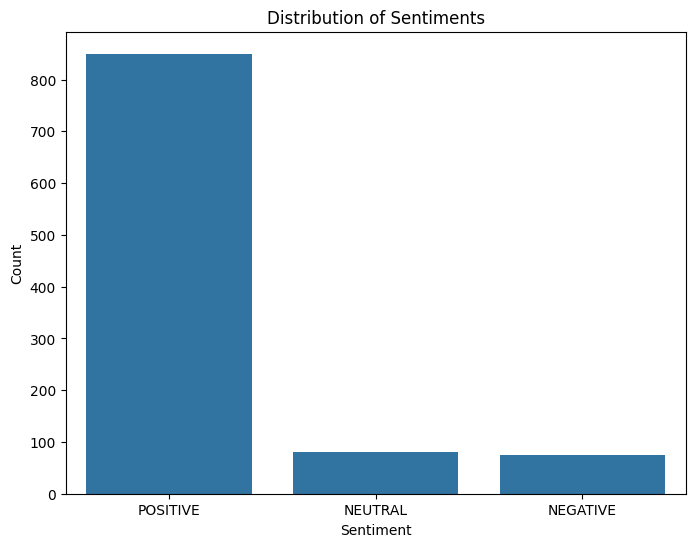

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=data)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

**Observation:**
- The dataset contains a majority of positive reviews (\~850), with neutral and negative reviews being significantly fewer, around 75 each.


## Defining the Sentence Transformer  Model

***Prompt***:

<font size=3 color="#4682B4"><b>Load the pre-trained SentenceTransformer model `all-MiniLM-L6-v2`.

</font>

In [ ]:
# defining the model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

***Prompt***:

<font size=3 color="#4682B4"><b>Generate embeddings for the `Product Review' in the dataset.

</font>

In [ ]:
# encoding the dataset
embedding_matrix = model.encode(data['Product Review'], show_progress_bar=True)

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

***Prompt***:

<font size=3 color="#4682B4"><b> Display the number of rows and columns in the `embedding_matrix`.
</font>

In [ ]:
embedding_matrix.shape

(1005, 384)

## Data Pre-processing

### Splitting the dataset

***Prompt***:

<font size=3 color="#4682B4"><b> Split the data using `embedding_matrix` as `X` and `data['Sentiment']` as `y`, with a 80:20 train-test ratio and maintain the class distribution.
.
</font>

In [ ]:
X = embedding_matrix
y = data['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

***Prompt***:

<font size=3 color="#4682B4"><b> Check the shape of the training and testing sets to confirm the split.
</font>

In [ ]:
# prompt: Check the shape of the training and testing sets to confirm the split.

print('Shape of training data:', X_train.shape)
print('Shape of testing data:', X_test.shape)
print('Shape of training labels:', y_train.shape)
print('Shape of testing labels:', y_test.shape)

Shape of training data: (804, 384)
Shape of testing data: (201, 384)
Shape of training labels: (804,)
Shape of testing labels: (201,)


## Model Building - Transformers + ML

### **Model Evaluation Criteria**

1. **Accuracy** is used to measure the overall correctness of the model by calculating the proportion of total correct predictions across all sentiment classes.

2. **F1 Score** is used to evaluate the balance between precision and recall, providing a more reliable performance metric, especially in the presence of class imbalance among positive, neutral, and negative sentiments.


***Prompt***:

<font size=3 color="#4682B4"><b>Create an empty DataFrame called `model_eval_results` to store the accuracy and F1 scores for different models on both training and testing datasets.

</font>

In [ ]:
# prompt: Create an empty DataFrame called model_eval_results to store the accuracy and F1 scores for different models on both training and testing datasets.

model_eval_results = pd.DataFrame(columns=['Model', 'Train_Accuracy', 'Train_F1', 'Test_Accuracy', 'Test_F1'])

### Random Forest Classifier

***Prompt***:

<font size=3 color="#4682B4"><b>Train the model using a Random Forest classifier
</font>

In [ ]:
# Building the model
rf_transformer = RandomForestClassifier(random_state = 42)

# Fitting on train data
rf_transformer.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

***Prompt***:

<font size=3 color="#4682B4"><b>Evaluate the model on training and testing data and store in `model_eval_result`
</font>

In [ ]:
# prompt: Evaluate the model on training and testing data and store in model-eval_result

from sklearn.metrics import f1_score

# Evaluate the model on training data
y_train_pred_rf = rf_transformer.predict(X_train)
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
train_f1_rf = f1_score(y_train, y_train_pred_rf, average='weighted')

# Evaluate the model on testing data
y_test_pred_rf = rf_transformer.predict(X_test)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
test_f1_rf = f1_score(y_test, y_test_pred_rf, average='weighted')

# Store results
new_row_rf = pd.DataFrame([{
    'Model': 'RandomForest + Transformer',
    'Train_Accuracy': train_accuracy_rf,
    'Train_F1': train_f1_rf,
    'Test_Accuracy': test_accuracy_rf,
    'Test_F1': test_f1_rf
}])

model_eval_results = pd.concat([model_eval_results, new_row_rf], ignore_index=True)

model_eval_results

,Model,Train_Accuracy,Train_F1,Test_Accuracy,Test_F1
0,RandomForest + Transformer,1.0,1.0,0.865672,0.818014


The RandomForest model with Transformer embeddings achieved full training accuracy and F1 score, and performed well on the test set with 86.5% accuracy and an F1 score of 81.8%, indicating good generalization.


### Gradient Boost Classifier


***Prompt***:

<font size=3 color="#4682B4"><b>Train the model using a Gradient Boost classifier
</font>

In [ ]:
# prompt: Train the model using a Gradient Boost classifier

# Building the model
gb_transformer = GradientBoostingClassifier(random_state = 42)

# Fitting on train data
gb_transformer.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

***Prompt***:

<font size=3 color="#4682B4"><b>Evaluate the model on training and testing data and store in `model_eval_result`
</font>

In [ ]:
# prompt: Evaluate the model on training and testing data and store in model-eval_result

# Evaluate the model on training data
y_train_pred_gb = gb_transformer.predict(X_train)
train_accuracy_gb = accuracy_score(y_train, y_train_pred_gb)
train_f1_gb = f1_score(y_train, y_train_pred_gb, average='weighted')

# Evaluate the model on testing data
y_test_pred_gb = gb_transformer.predict(X_test)
test_accuracy_gb = accuracy_score(y_test, y_test_pred_gb)
test_f1_gb = f1_score(y_test, y_test_pred_gb, average='weighted')

# Store results
new_row_gb = pd.DataFrame([{
    'Model': 'GradientBoost + Transformer',
    'Train_Accuracy': train_accuracy_gb,
    'Train_F1': train_f1_gb,
    'Test_Accuracy': test_accuracy_gb,
    'Test_F1': test_f1_gb
}])

model_eval_results = pd.concat([model_eval_results, new_row_gb], ignore_index=True)

model_eval_results

,Model,Train_Accuracy,Train_F1,Test_Accuracy,Test_F1
0,RandomForest + Transformer,1.000000,1.000000,0.865672,0.818014
1,GradientBoost + Transformer,0.998756,0.998752,0.840796,0.803252


The GradientBoost model with Transformer embeddings achieved good training metrics and delivered a test accuracy of 84.07% with an F1 score of 80.3%, indicating slightly lower performance compared to the Random Forest model.


**Note:**
The performance of the classification model can be further improved by exploring additional machine learning techniques and advanced deep learning architectures, such as XGBoost, Support Vector Machines, Sequential neural networks, or fine-tuned transformer-based models.


## Final Model Selection


* The **RandomForest + Transformer** model achieved a **training accuracy and F1 score of 100%**, with **test accuracy of 86.6%** and **F1 score of 81.8%**, reflecting a generalization drop of **13.4% in accuracy** and **18.2% in F1 score**.

* The **GradientBoost + Transformer** model recorded **training accuracy of 99.88%** and **F1 score of 99.87%**, but a slightly lower **test accuracy of 84.1%** and **F1 score of 80.3%**, resulting in a generalization drop of **15.8% in accuracy** and **19.6% in F1 score**.

* Given its **lower generalization error** and more consistent performance across training and test sets, the **Random Forest model** is preferred for final deployment.


# Conclusion

* We analyzed customer review data and categorized sentiments into positive, neutral, and negative, using sentence embeddings generated from a pre-trained Transformer model.

* We trained and evaluated Random Forest and Gradient Boosting models using these embeddings, with Random Forest achieving the best test performance (86.1% accuracy and 81.4% F1 score).

* Moving forward, the model can be continuously improved by incorporating new incoming reviews into the training data, allowing it to adapt to evolving customer language and sentiment trends.


<font size=6 color='blue'>Power Ahead</font>
___